# Problem 1

(a) As for the Logistic distribution with CDF $F(x) = \dfrac{1}{1 + e^{-x}}, \forall x \in R$, we first do the inverse transformation, we get that $\dfrac{F(x)}{1 - F(x)} = e^x$, then we get that $$ln(\dfrac{F(x)}{1 - F(x)}) = x \rightarrow F^{-1}(x) = ln(\dfrac{x}{1 - x}). $$
Then we can do sampling, code are as follows. 

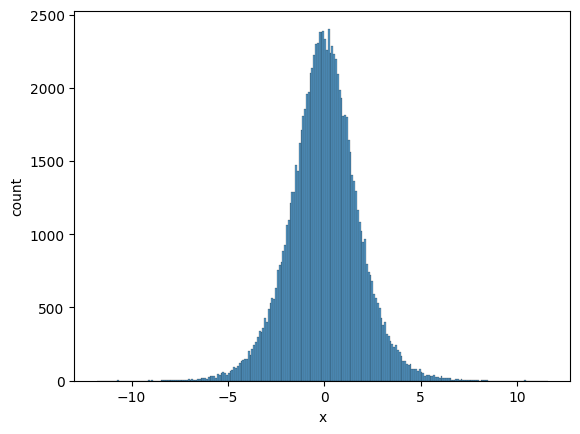

In [28]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
inverse = np.log(x/(1 - x))
# plot the histogram
plot = sns.histplot(inverse, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count');

(b) As for the Rayleigh distribution with CDF $F(x) = 1 - e^{\frac{-x^2}{2}}, \forall x > 0$, we first do the inverse transformation, we get that $1 - F(x) = e^{-\frac{x^2}{2}}$, then we get that $$ln(1 - F(x)) = -\frac{x^2}{2} \rightarrow F^{-1}(x) = \sqrt{-2ln(1 - x)}. $$
Then we can do sampling, code are as follows. 

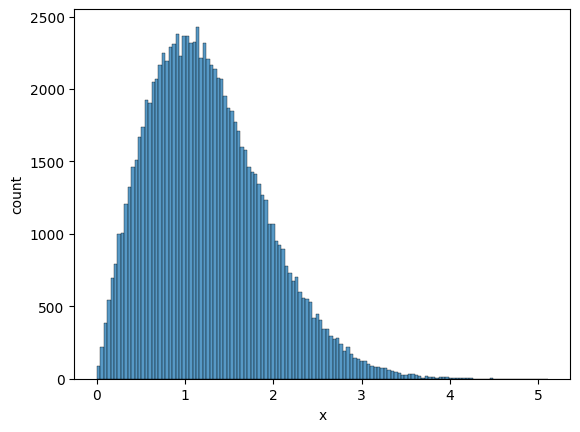

In [27]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
inverse = np.sqrt(-2*np.log(1 - x))
# plot the histogram
plot = sns.histplot(inverse, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count');

(c) As for the Exponential distribution with CDF $F(x) = 1 - e^{-x}, x > 0$, we first do the inverse transformation, we get that $1 - F(x) = e^{-x}$, then we get that $$ln(1 - F(x)) = -x \rightarrow F^{-1}(x) = -ln(1 - x). $$
Then we can do sampling, code are as follows. 

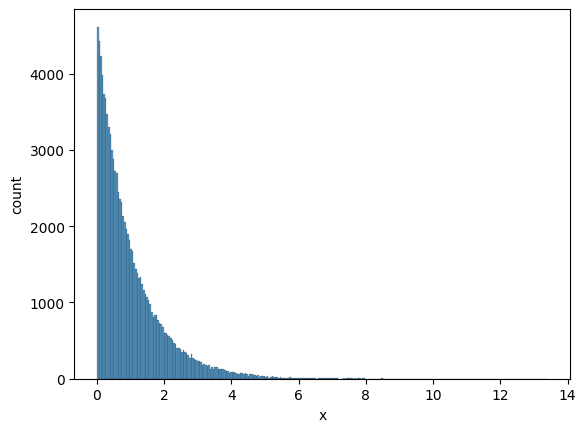

In [26]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
inverse = -np.log(1 - x)
# plot the histogram
plot = sns.histplot(inverse, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('count');

# Problem 2

(a) Bernoulli distribution Bern(0.5), we have that when generate a random number between 0 and 1, if it is less than 0.5, we get 0, otherwise we get 1. Code are as follows.


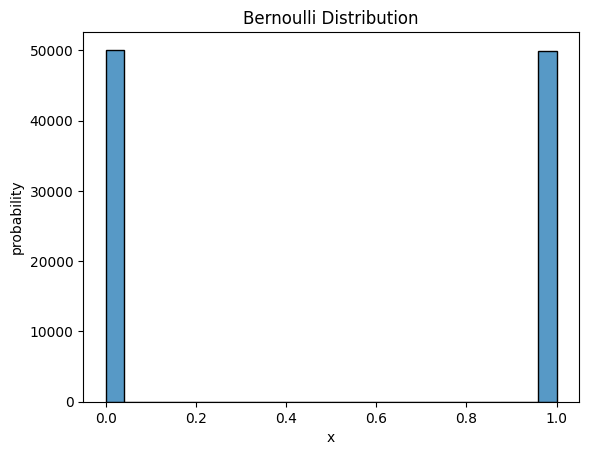

In [31]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate sameple points
x = np.random.uniform(0, 1, N)
# define bernoulli success probability
p = 0.5
# determine if the trail get 0 or 1
for i in range(N):
    if x[i] < p:
        x[i] = 0
    else:
        x[i] = 1
# plot the histogram
plot = sns.histplot(x, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('probability')
plot.set_title('Bernoulli Distribution');

(b) Binomial distribution Bin(20, 0.5), we have that as binomial trail are the combination of bernoulli distribution, then when generate a random number between 0 and 1, if it is less than 0.5, we get 0, otherwise we get 1. Then we compute the sum of the 20 times bernoulli trails and get the result. Code are as follows.

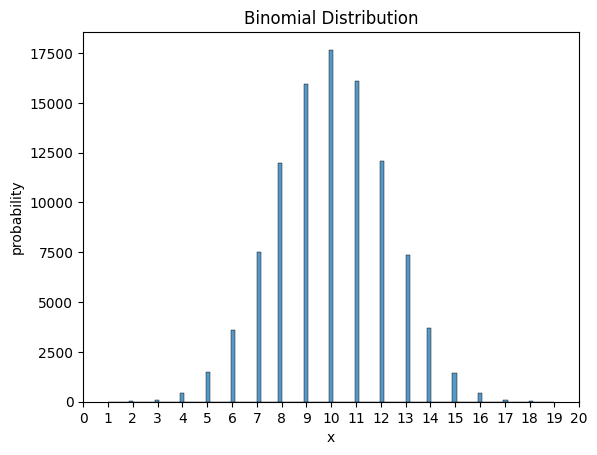

In [32]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate result points
x = np.zeros(N)
# define bernoulli success probability
p = 0.5
# define binomial trail number
n = 20
# determine if the trail get 0 or 1
for i in range(N):
    # generate n bernoulli trails
    y = np.random.uniform(0, 1, n)
    for j in y:
        if j < p:
            x[i] += 1
        
# plot the histogram
plot = sns.histplot(x, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('probability')
plot.set_title('Binomial Distribution')
plot.set_xticks([i for i in range(0, 21)]);

(c) Geometric distribution Geom(0.5), we get that as geometric distribution is the combination of bernoulli with probability of 0.5, then we calculate the failure times before the first success. Code are as follows.

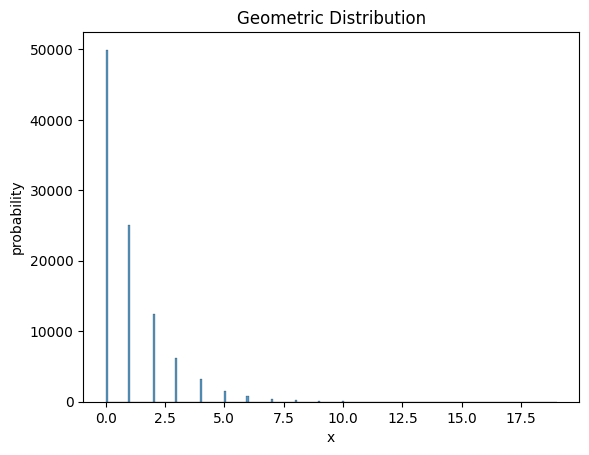

In [33]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate result points
x = np.zeros(N)
# define bernoulli success probability
p = 0.5
# determine if the trail get 0 or 1
for i in range(N):
    # sum bernoulli trails until the first success
    while True:
        y = np.random.uniform(0, 1)
        if y < p:
            break
        else:
            x[i] += 1
        
# plot the histogram
plot = sns.histplot(x, stat = 'count')
plot.set_xlabel('x')
plot.set_ylabel('probability')
plot.set_title('Geometric Distribution');

(d) Negative Binomial distribution NBin(0.5), we get that as negative binomial distribution is the combination of bernoulli with probability of 0.5, then we calculate the failure times before the first success. Code are as follows.

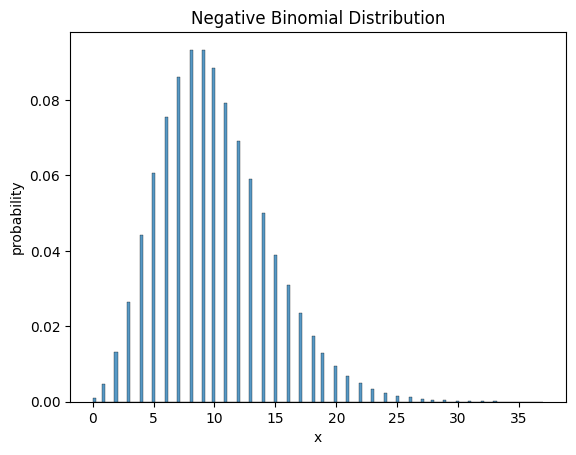

In [34]:
import numpy as np
import seaborn as sns

# define the sample number
N = 100000
# generate result points
x = np.zeros(N)
# define bernoulli success probability
p = 0.5
# define binomial trail number
n = 10
# determine if the trail get 0 or 1
for i in range(N):
    # sum bernoulli trails until the nth success
    sucess = 0
    while sucess < n:
        y = np.random.uniform(0, 1)
        if y < p:
            sucess += 1
        else:
            x[i] += 1
        
# plot the histogram
plot = sns.histplot(x, stat = 'probability')
plot.set_xlabel('x')
plot.set_ylabel('probability')
plot.set_title('Negative Binomial Distribution');

# Problem 3

(a) As we have the definition of sample mean, we get that $$\bar{X} = \dfrac{1}{n}\sum_{i=1}^{n}X_i. $$ Then we can calculate the mean of the 5000 times of sample mean of 100000 $U_i$ of the N distribution. Code are as follows.

In [66]:
import numpy as np

# define the sample number
N = 100000
# define the number of generate times
M = 5000
# generate result points
x = np.zeros(M)
# estimate E(N) by generateing 5000 values of N
for i in range(M):
    # generate sameple points
    y = np.random.uniform(0, 1, N)
    # define the product
    product = 1
    # calculate the product
    for j in range(1, N + 1):
        product *= y[j - 1]
        if product < np.exp(-1):
            x[i] = j - 1
            break

In [65]:
# print result
print('E(N) estimated by generateing 5000 values of N is', np.mean(x))

E(N) estimated by generateing 5000 values of N is 1.001


(b) As for the Var(N), we can use the 5000 times of generated sample mean to calculate the variance of the sample mean. Code are as follows.

In [57]:
# print result
print('Var(N) estimated by generateing 5000 values of N is', np.var(x))

E(N) estimated by generateing 5000 values of N is 0.97925116


(c) As for the P(N = i), where i = 0, 1, 2, 3, we can use the 5000 times of generated sample mean to calculate the variance of the sample mean. Code are as follows.

In [67]:
from collections import Counter
# print result
for i in range(0, 4):
    print('P(N = %d) estimated by generateing 5000 values of N is' % i, Counter(x)[i]/M)

P(N = 0) estimated by generateing 5000 values of N is 0.3572
P(N = 1) estimated by generateing 5000 values of N is 0.3788
P(N = 2) estimated by generateing 5000 values of N is 0.187
P(N = 3) estimated by generateing 5000 values of N is 0.0556


(d) As for the exact distribution of N, the solution is $N \sim Pois(1)$, the calculation is as follows.

As we have that $$$$